Importing the required packages

In [0]:
!pip install torchsummary

In [0]:
import os
import torch
import torch.nn as n
import torch.nn.functional as f
import numpy as np
import os
from torchsummary import summary
import torch.optim as optim
from tqdm import tqdm
from torchvision import models
import cv2
from matplotlib import pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip stage_1_test_images.zip -d /IHCT/

Defining the celebrity dataset folder and listing all images

In [0]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seem for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [0]:
Data = "/IHCT/stage_2_test_images/"
images = os.listdir(Data)

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('stage_2_test_images.csv')

In [0]:
df.head()

,ID,Label
0,ID_0fbf6a978_epidural,0.5
1,ID_0fbf6a978_intraparenchymal,0.5
2,ID_0fbf6a978_intraventricular,0.5
3,ID_0fbf6a978_subarachnoid,0.5
4,ID_0fbf6a978_subdural,0.5


In [0]:
def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img 

In [0]:
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [0]:
! pip install pydicom

     |████████████████████████████████| 35.3MB 88kB/s 


In [0]:
import pydicom

In [3]:
## show some images after using window function

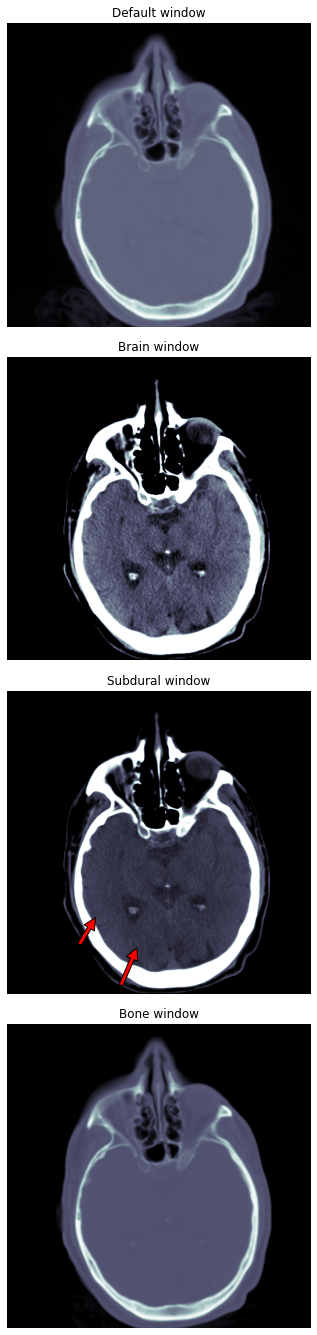

/IHCT/stage_2_test_images/ID_8c8f3fe24.dcm


In [0]:
case = os.path.join(Data,'ID_8c8f3fe24.dcm')
data = pydicom.read_file(case)
#print(data)
window_center , window_width, intercept, slope = get_windowing(data)
img = pydicom.read_file(case).pixel_array
#displaying the image

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex='col', figsize=(10,24), gridspec_kw={'hspace': 0.1, 'wspace': 0})

ax1.set_title('Default window')
im1 = ax1.imshow(img,  cmap=plt.cm.bone)

ax2.set_title('Brain window')
img2 = window_image(img, 40, 80, intercept, slope)
im2 = ax2.imshow(img2, cmap=plt.cm.bone)

ax3.set_title('Subdural window')
img3 = window_image(img, 80, 200, intercept, slope)
im3 = ax3.imshow(img3, cmap=plt.cm.bone)
ax3.annotate('', xy=(150, 380), xytext=(120, 430),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax3.annotate('', xy=(220, 430), xytext=(190, 500),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )

ax4.set_title('Bone window')
img4 = window_image(img, 600, 2800, intercept, slope)
im4 = plt.imshow(img4, cmap=plt.cm.bone)

for ax in fig.axes:
    ax.axis("off")
    
plt.show()
print(case)
